In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [88]:
path = 'http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv'
df = pd.read_csv(path, index_col=0)

# The dataset describes advertising dollars spend in each venue (TV, Radio, Newspaper)
# and the corresponding Sales

In [89]:
# Print out the dataframe schema (data dictionary)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 7.8 KB


In [90]:
# Are there any null values? If so, should we filter out, all, or some?
#df.fillna('Unkown')
#df.isnull().sum()
df.isnull().any()

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

In [91]:
# Print out summary statistics of the dataframe
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [92]:
# show the first 10 rows of the dataframe
df.head(10)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


In [93]:
# how many rows in the dataframe, if you did filter or did not filter?
# Do not use count!. Hint. Look into shape on a dataframe object
df.shape#200 rows, 4 columns ('Tv, 'Radio', 'Newspaper', and 'Sales')

(200, 4)

In [94]:
# What was the sum of all Sales when spent on Radio was greater than or equal to 10K?
#salesTotal = df.loc[df['Radio'] >= 10]
#salesTotal['Sales'].sum()

df2 = df[df.Radio >= 10]
df2.head(4)

totalSales = df2.Sales
print sum(totalSales.tolist())

2280.9


In [95]:
# create a fourth column in the dataFrame, called All, that symbolizes all advertising dollars spent
# You must use an apply. i.e. df['All'] = df.apply(someFunction, axis = 1)
# When you do axis = 1 you tell it to map line by line instead of column through the entire df

#But this is asking you to sum the first 3 columns
#You could create a temporary dataframe that excludes the 'Sales' column

#df['Total'] = df.sum(axis = 1)
#df

#df['Total'] = df.TV + df.Radio + df.Newspaper + df.Sales
#df

#df['Total'] = df.apply(np.sum, axis = 1)
#df
#def sumSpends(series):
    #return series[0] + series[1] + series[2]

def sumSpends(series):
    return sum(series[0:-1])#sum from index 0 up to but not including the last index

df['Total'] = df.apply(sumSpends, axis = 1)

df.head()

,TV,Radio,Newspaper,Sales,Total
1,230.1,37.8,69.2,22.1,337.1
2,44.5,39.3,45.1,10.4,128.9
3,17.2,45.9,69.3,9.3,132.4
4,151.5,41.3,58.5,18.5,251.3
5,180.8,10.8,58.4,12.9,250.0


In [96]:
# Create 4 Scatter Plots

# 1. TV Spend Vs Sales (x = TV Spend, y = Sales)
# 2. Radio Spend Vs Sales ( x = Radio Spend, y = Sales )
# 3. Newspaper Spend Vs Sales ( x = Newspaper Spend, y = Sales )
# 4. All Advertisting Spend Vs. Sales ( x = All Advertising Spend, y = Sales )
# HINT: fig, axs = plt.subplots(1, 4, sharey=True), and then use df.plot 4 times
# with correct x and y labels and ax labels.

# What Conclusions can you make? i.e. more advertising dollars spent in TV, increases sales
# More than Radio Sales? 

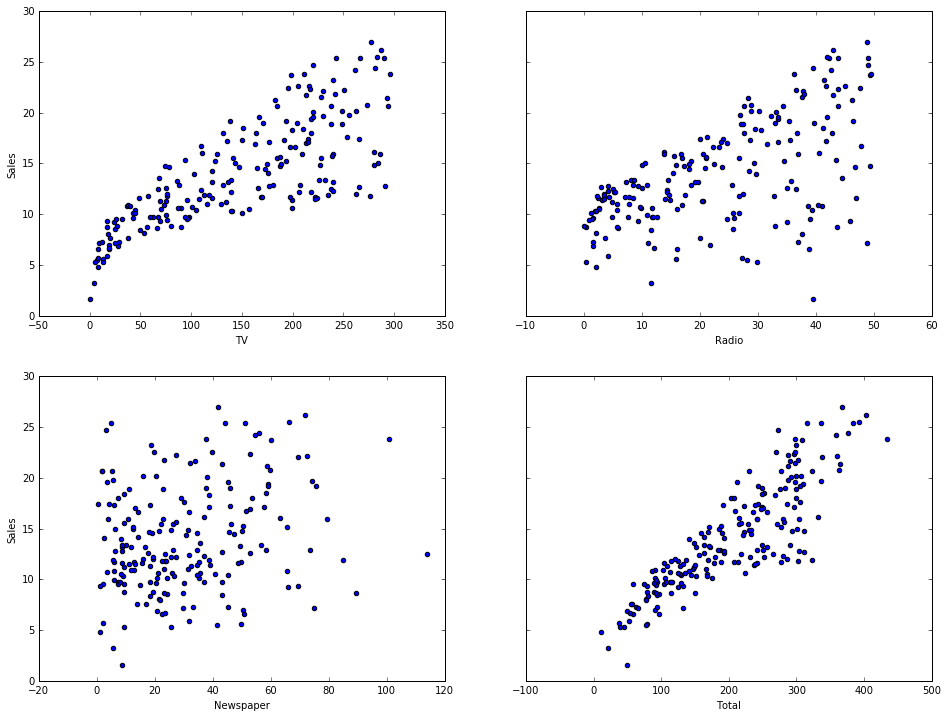

In [98]:
#rows = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
#         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
#for y in names:
#    if x != 'MEDV':
#        data.plot.scatter(x, 'MEDV')

fig, axs = plt.subplots(2, 2, sharey=True, figsize=(16,12))
df.plot.scatter(x='TV', y='Sales', ax=axs[0,0])
df.plot.scatter(x='Radio', y='Sales', ax=axs[0,1])
df.plot.scatter(x='Newspaper', y='Sales', ax=axs[1,0])
df.plot.scatter(x='Total', y='Sales', ax=axs[1,1])